## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Import Necessary Modules

In [1249]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.express as px

# Cleaning Movie Gross Dataset

In [1250]:
#DROPPED_DF_BOM

df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_bom
#df_bom

#gets rid of sci-not
pd.set_option('display.float_format', lambda x: '%.9f' % x)

#dropping NAs
dropped_df_bom = df_bom.dropna()

#making foreign gross a float
dropped_df_bom['foreign_gross'] = dropped_df_bom['foreign_gross'].str.replace(',', '').astype(float)

#domestic - foreign gross
dropped_df_bom['dom-for (d-f)'] = ((dropped_df_bom.loc[:,'domestic_gross'])-(dropped_df_bom.loc[:,'foreign_gross']))

#domestic - foreign ratio
dropped_df_bom['domestic_to_foreign_ratio'] = ((dropped_df_bom.loc[:,'domestic_gross'])/(dropped_df_bom.loc[:,'foreign_gross']))

#total gross
dropped_df_bom['total_gross'] = ((dropped_df_bom.loc[:,'domestic_gross'])+(dropped_df_bom.loc[:,'foreign_gross']))

dropped_df_bom

<ipython-input-1250-870320a4e21b>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1250-870320a4e21b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1250-870320a4e21b>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1

,title,studio,domestic_gross,foreign_gross,year,dom-for (d-f),domestic_to_foreign_ratio,total_gross
0,Toy Story 3,BV,415000000.000000000,652000000.000000000,2010,-237000000.000000000,0.636503067,1067000000.000000000
1,Alice in Wonderland (2010),BV,334200000.000000000,691300000.000000000,2010,-357100000.000000000,0.483437003,1025500000.000000000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000000000,664300000.000000000,2010,-368300000.000000000,0.445581815,960300000.000000000
3,Inception,WB,292600000.000000000,535700000.000000000,2010,-243100000.000000000,0.546201232,828300000.000000000
4,Shrek Forever After,P/DW,238700000.000000000,513900000.000000000,2010,-275200000.000000000,0.464487254,752600000.000000000
...,...,...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.000000000,1500000.000000000,2018,-1498600.000000000,0.000933333,1501400.000000000
3286,The Catcher Was a Spy,IFC,725000.000000000,229000.000000000,2018,496000.000000000,3.165938865,954000.000000000
3309,Time Freak,Grindstone,10000.000000000,256000.000000000,2018,-246000.000000000,0.039062500,266000.000000000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.000000000,5200.000000000,2018,88000.000000000,17.923076923,98400.000000000


# Cleaning IMDB Dataset

In [24]:
#SQLDF_GENRES_DROP

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
q = ("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""")

sqldf = pd.read_sql(q,conn)
#sqldf

#editting genres column
sqldf_genres_drop = sqldf.dropna()
sqldf_genres_drop['genres'] = sqldf_genres_drop['genres'].map(lambda x:x.split(','))
sqldf_genres_drop['genres'].map(lambda x: str(x))

#creating new genre columns
sqldf_genres_drop['genre1'] = sqldf_genres_drop['genres'].apply(lambda x: x[0])
sqldf_genres_drop['genre2'] = sqldf_genres_drop['genres'].apply(lambda x: x[1] if (len(x) == 2 or len(x) == 3) else '')
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genre1'] + '-' + sqldf_genres_drop['genre2']
#len(sqldf_genres_drop['genres_cleaned'][0])
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.rstrip('-') if x.endswith('-') else x)

#Animation, Adventure, Documentary,Drama genres 
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Action') if x.endswith('-Action') or x.startswith('Action-') or x == ('Action') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Animation') if x.endswith('-Animation') or x.startswith('Animation-') or x == ('Animation') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Adventure') if x.endswith('-Adventure') or x.startswith('Adventure-') or x == ('Adventure') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Documentary') if x.endswith('-Documentary') or x.startswith('Documentary-') or x == ('Documentary') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Drama') if x.endswith('-Drama') or x.startswith('Drama-') or x == ('Drama') else x)

#renaming column for merge
sqldf_genres_drop.rename(columns = {'primary_title':'title','start_year':'year'},inplace=True)

sqldf_genres_drop

<ipython-input-24-e1c3c54a3c20>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqldf_genres_drop['genres'] = sqldf_genres_drop['genres'].map(lambda x:x.split(','))
<ipython-input-24-e1c3c54a3c20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqldf_genres_drop['genre1'] = sqldf_genres_drop['genres'].apply(lambda x: x[0])
<ipython-input-24-e1c3c54a3c20>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,movie_id,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genres_cleaned
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000000,"[Action, Crime, Drama]",7.000000000,77,Action,Crime,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000000,"[Biography, Drama]",7.200000000,43,Biography,Drama,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000000,[Drama],6.900000000,4517,Drama,,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000000,"[Comedy, Drama, Fantasy]",6.500000000,119,Comedy,Drama,Drama
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.000000000,"[Adventure, Animation, Comedy]",8.100000000,263,Adventure,Animation,Animation
...,...,...,...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.000000000,[Drama],8.400000000,365,Drama,,Drama
73850,tt9913056,Swarm Season,Swarm Season,2019,86.000000000,[Documentary],6.200000000,5,Documentary,,Documentary
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000000,[Documentary],6.200000000,6,Documentary,,Documentary
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000000,"[Drama, Family]",8.700000000,136,Drama,Family,Drama


# Merging the Datasets for Analysis

In [5]:
#merge two tables on shared columns of title and year
merged_df = sqldf_genres_drop.merge(dropped_df_bom, how='inner',on=['title','year'])
merged_df


# Creating Layout for Analysis

In [1428]:
#creating a basic layout to further analyze joined dataset
good_df = merged_df.groupby(['studio','genres_cleaned','title'],as_index = True)[['year','domestic_gross','foreign_gross','total_gross','runtime_minutes','averagerating']].mean().sort_values(by=['total_gross'],ascending=[False])
no_index = good_df.reset_index()
no_index['studio'] = no_index['studio'].apply(lambda x:x.replace(x,'WB') if x == 'WB (NL)' else x)
no_index

,studio,genres_cleaned,title,year,domestic_gross,foreign_gross,total_gross,runtime_minutes,averagerating
0,BV,Action,Avengers: Age of Ultron,2015,459000000.000000000,946400000.000000000,1405400000.000000000,141.000000000,7.300000000
1,BV,Action,Black Panther,2018,700100000.000000000,646900000.000000000,1347000000.000000000,134.000000000,7.300000000
2,BV,Action,Star Wars: The Last Jedi,2017,620200000.000000000,712400000.000000000,1332600000.000000000,152.000000000,7.100000000
3,Uni.,Action,Jurassic World: Fallen Kingdom,2018,417700000.000000000,891800000.000000000,1309500000.000000000,128.000000000,6.200000000
4,BV,Animation,Frozen,2013,400700000.000000000,875700000.000000000,1276400000.000000000,102.000000000,7.500000000
...,...,...,...,...,...,...,...,...,...
1247,Magn.,Documentary,Freakonomics,2010,101000.000000000,16400.000000000,117400.000000000,93.000000000,6.400000000
1248,Yash,Drama,Band Baaja Baaraat,2010,43800.000000000,60700.000000000,104500.000000000,139.000000000,7.200000000
1249,First,Crime-Thriller,As Good as Dead,2010,2000.000000000,53600.000000000,55600.000000000,100.000000000,5.200000000
1250,IFC,Drama,Inhale,2010,4100.000000000,51000.000000000,55100.000000000,83.000000000,6.600000000


# BEGINNING OF ANALYSIS

# BAR PLOT OF MOVIE GROSS BY GENRE AND BOXPLOTS TOO

In [1563]:
#Plot top 100 movies based on top 4 genres, as other genres only had one movie
movies = no_index.groupby(['title','genres_cleaned'])['total_gross'].sum().sort_values(ascending=False).reset_index().head(100)
movies_genre = movies.loc[(movies['genres_cleaned'] == 'Action')|(movies['genres_cleaned'] == 'Animation')|(movies['genres_cleaned'] == 'Adventure')|(movies['genres_cleaned'] == 'Drama')]
total_per_genre = movies_genre.groupby('genres_cleaned')['total_gross'].sum().sort_values(ascending=False).reset_index()
px.bar(total_per_genre,x='genres_cleaned',y='total_gross',title='Total Gross of Top 100 Movies Based on Genre',
      labels = {'genres_cleaned':'Genres','total_gross':'Total Gross'},
      color='genres_cleaned')




# SWARM AND BOX PLOTS OF MOVIES BY GENRE

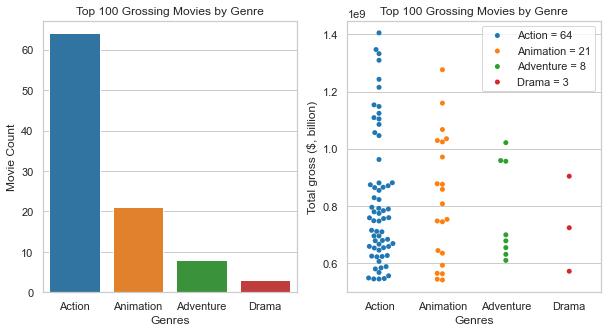

In [1564]:
#Organize movies by top 100 by total gross, use genres as colors
movies = no_index.groupby(['title','genres_cleaned'])['total_gross'].sum().sort_values(ascending=False).reset_index().head(100)
movies_genre = movies.loc[(movies['genres_cleaned'] == 'Action')|(movies['genres_cleaned'] == 'Animation')|(movies['genres_cleaned'] == 'Adventure')|(movies['genres_cleaned'] == 'Drama')]
totals = movies_genre.groupby('genres_cleaned').count().sort_values(by = 'total_gross',ascending=False).reset_index()
totals

fig, axes = plt.subplots(1,2, figsize = (10,5))

#Barplot
sns.barplot(ax=axes[0],data=totals,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Movie Count', title = 'Top 100 Grossing Movies by Genre')

#Swarmplot
sns.swarmplot(ax=axes[1],data=movies_genre,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Total gross ($, billion)', title = 'Top 100 Grossing Movies by Genre')

#list from value_counts by genre
a = ['Action = 64','Animation = 21','Adventure = 8','Drama = 3']

plt.legend(a);


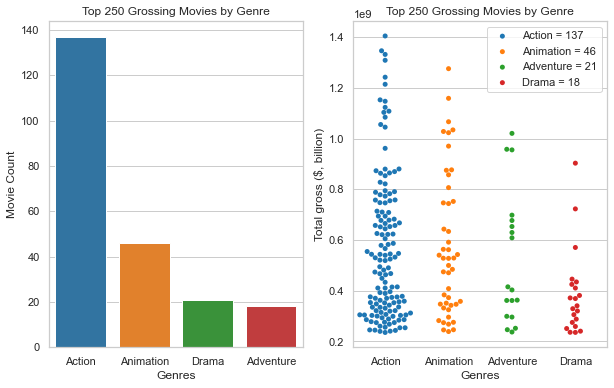

In [1565]:
#Organize top 250 movies by title, genres and total gross
top250 = no_index.groupby(['title','genres_cleaned'])['total_gross'].sum().sort_values(ascending=False).reset_index().head(250)
top250_genres = top250.loc[(top250['genres_cleaned'] == 'Action')|(top250['genres_cleaned'] == 'Animation')|(top250['genres_cleaned'] == 'Adventure')|(top250['genres_cleaned'] == 'Drama')]
totals = top250_genres.groupby('genres_cleaned').count().sort_values(by='total_gross',ascending=False).reset_index()
totals
fig, axes = plt.subplots(1,2, figsize = (10,6))

#Barplot
sns.barplot(ax = axes[0],data=totals,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Movie Count', title = 'Top 250 Grossing Movies by Genre')
#Swarmplot
sns.swarmplot(ax = axes[1],data=top250_genres,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Total gross ($, billion)', title = 'Top 250 Grossing Movies by Genre')

#list of value_counts by genre
a = ['Action = 137','Animation = 46','Adventure = 21','Drama = 18']
plt.legend(a);


In [1457]:
#top500 = no_index.groupby(['title','genres_cleaned'])[['averagerating','total_gross']].sum().sort_values(by ='total_gross',ascending=False).reset_index().head(500)
#top500_genres = top500.loc[(top250['genres_cleaned'] == 'Action')|(top500['genres_cleaned'] == 'Animation')|(top500['genres_cleaned'] == 'Adventure')|(top500['genres_cleaned'] == 'Drama')]

#fig, axes = plt.subplots(1,2, figsize = (10,6))

#BOX
#sns.boxplot(ax=axes[0],data=top500_genres,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Total gross ($, billion)', title = 'Top 500 Grossing Movies')

#SWARM
#sns.swarmplot(ax = axes[1],data=top500_genres,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Total gross ($, billion)', title = 'Top 500 Grossing Movies')

#a= ['Action - 137','Animation - 46','Adventure - 40','Drama - 88']
#plt.legend(a);

In [1521]:
#box+whisker plot with production company as x, gross as y, hue=genres
#stu = no_index.groupby(['studio','genres_cleaned','title'])[['averagerating','total_gross']].sum().sort_values(by ='total_gross',ascending=False).reset_index().head(100)

#stu = stu.loc[(stu['genres_cleaned'] == 'Action')|(stu['genres_cleaned'] == 'Animation')]
#stu = stu.loc[(stu['studio'] == 'BV')|(stu['studio'] == 'WB')|(stu['studio'] == 'Fox')|(stu['studio'] == 'Uni.')|(stu['studio'] == 'Par.')]
#stu
#sns.boxplot(data=stu,x='studio',y='total_gross',hue='genres_cleaned').set(xlabel ='Studio', ylabel= 'Total gross ($, billion)', title = 'Studio Grossing by Genre');


In [1522]:
#box+whisker plot with production company as x, gross as y, hue=genres
#stu = no_index.groupby(['studio','genres_cleaned','title'])[['averagerating','total_gross']].sum().sort_values(by ='total_gross',ascending=False).reset_index().head(250)

#stu = stu.loc[(stu['genres_cleaned'] == 'Action')|(stu['genres_cleaned'] == 'Animation')]
#stu = stu.loc[(stu['studio'] == 'BV')|(stu['studio'] == 'WB')|(stu['studio'] == 'Fox')|(stu['studio'] == 'Uni.')|(stu['studio'] == 'Par.')]
#stu
#sns.boxplot(data=stu,x='studio',y='total_gross',hue='genres_cleaned').set(xlabel ='Studio', ylabel= 'Total gross ($, billion)', title = 'Studio Grossing by Genre');

# Top 10 Studios

In [1566]:
#Top 10 Studios by gross
a = px.bar(no_index.groupby('studio')['total_gross'].sum().sort_values(ascending=False).reset_index().head(10),x='studio',y='total_gross',title = 'Top 10 Studios by Total Gross',labels = {'studio':'Studio','total_gross':'Total Gross ($)'},color = 'studio');
a

# Top 5 Studios Genre Proportions

In [1436]:
#MAKING SURE IT ONLY HAS ANIM AND ACT, REST AS OTHER

#no_index

In [1437]:
#Separate studios into top 5
new_no_index = no_index.groupby(['studio','genres_cleaned']).sum().sort_values(by='total_gross',ascending=False).reset_index()
for i,x in enumerate(new_no_index['studio']): 
    if x == 'BV': 
        new_no_index.loc[i,'studio'] = 'BV'
    elif x == 'Fox': 
        new_no_index.loc[i,'studio'] = 'Fox'
    elif x == 'Uni.':
        new_no_index.loc[i,'studio'] = 'Uni.'
    elif x == 'Par.':
        new_no_index.loc[i,'studio'] = 'Par.'
    elif x == 'WB':
        new_no_index.loc[i,'studio'] = 'WB'
    else:
        new_no_index.loc[i,'studio'] = 'other'

new_no_index_deleted = new_no_index.loc[new_no_index['studio'] != 'other']
new_no_index_deleted

#Bar Chart
px.bar(new_no_index_deleted,x='studio',y='total_gross',color='genres_cleaned',title='Total Gross by Studio Separated by Action, Animation and Other Genres');


# WHY NOT WORKING ANYMORE

In [1438]:
#for i,x in enumerate(new_no_index_deleted['genres_cleaned']): 
#    if x == 'Animation': 
#        new_no_index_deleted.loc[i,'genres_cleaned'] = 'Animation'
#    elif x == 'Action': 
#        new_no_index_deleted.loc[i,'genres_cleaned'] = 'Action'
#    else: 
#        new_no_index_deleted.loc[i,'genres_cleaned'] = 'Total'

#new_no_index_deleted2 = new_no_index_deleted.loc[(new_no_index_deleted['genres_cleaned'] == 'Animation')|
#                                        (new_no_index_deleted['genres_cleaned'] == 'Action')|
#                                        (new_no_index_deleted['genres_cleaned'] == 'Total')]
#new_no_index_deleted2
#new_no_index_deleted2.loc[(new_no_index_deleted2['genres_cleaned']=='Animation')|(new_no_index_deleted2['genres_cleaned']=='Action')]
#px.bar(new_no_index_deleted2,x='studio',y='total_gross',color='genres_cleaned',title='Total Gross by Studio Separated by Action, Animation and Other Genres')


# RUNTIME ACTION V ANIMATION

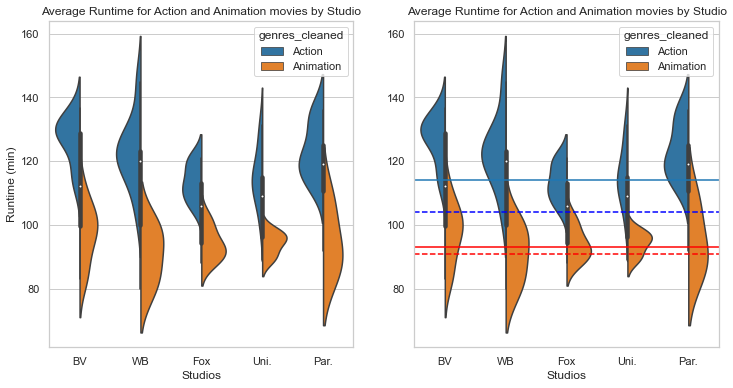

In [1488]:
#compare runtime to total gross for action and animation movies
runtime = no_index.groupby(['genres_cleaned','year','studio'])[['runtime_minutes','total_gross']].mean().sort_values(by='total_gross',ascending=False)
runtime.reset_index(inplace=True)

#trying to do top 5 studios only
bv = runtime.loc[(runtime['studio'] == 'BV')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'BV') & (runtime['genres_cleaned']== 'Animation')]
wb = runtime.loc[(runtime['studio'] == 'WB')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'WB') & (runtime['genres_cleaned']== 'Animation')]
fox = runtime.loc[(runtime['studio'] == 'Fox')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'Fox') & (runtime['genres_cleaned']== 'Animation')]
uni = runtime.loc[(runtime['studio'] == 'Uni.')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'Uni.') & (runtime['genres_cleaned']== 'Animation')]
par = runtime.loc[(runtime['studio'] == 'Par.')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'Par.') & (runtime['genres_cleaned']== 'Animation')]
studio_runtime = pd.concat([bv,wb,fox,uni,par], axis = 0)

#studio_runtime


fig,axes = plt.subplots(1,2,figsize=(12,6))

#violin plots
sns.violinplot(ax = axes[0],data=studio_runtime, x="studio", y="runtime_minutes", hue="genres_cleaned",split=True).set(xlabel='Studios',ylabel='Runtime (min)',title='Average Runtime for Action and Animation movies by Studio')
sns.violinplot(ax = axes[1],data=studio_runtime, x="studio", y="runtime_minutes", hue="genres_cleaned",split=True).set(xlabel='Studios',ylabel='',title='Average Runtime for Action and Animation movies by Studio')

#median lines
plt.axhline(y = 114, linestyle = '-')
plt.axhline(y = 93, color = 'r',linestyle = '-')
plt.axhline(y = 91, color = 'r', linestyle = '--')
plt.axhline(y = 104, color = 'b', linestyle = '--');
